In [1]:
!pip install tweepy

  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl


In [5]:
import tweepy
from tweepy import OAuthHandler

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

#### Account and API access setup

In [6]:
#Customer credentials

consumer_key = "FGIFP90W1vzX1mkLCXicUvAr5"

consumer_secret = "M6SeE8PRGgd1u0kPXOlt6c3mwGof3YAYun57UIqSzvs1WkhQYa"

access_token = "294560315-5PGJ88SqWeGm2jyOv2BKVXGYiUUT9hMsbP3RN8d7"

access_token_secret = "guyVDrb3t6zM4yq1URp5W1XYPBpJZZ1UCEVieqZRwGTzj"

In [7]:
#Setup for API access
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Set up complete! Now you can get live tweets straight from Twitter!

### Twitter API reference

http://docs.tweepy.org/en/v3.5.0/api.html

In [8]:
#Get the tweets from my timeline
tweets = api.home_timeline()

In [9]:
type(tweets)

tweepy.models.ResultSet

In [10]:
print(tweets[0].text)
print(tweets[1].text)

RT @SSanbeer: Major media houses have pulled a major spin of the draconian amendment in Kerala, which can lead to imprisonment of people fo…
Kerala CM @vijayanpinarayi is trying to silence the Opposition, the media &amp; his critics. This is undemocratic &amp; ant… https://t.co/30MB9h9PC4


In [11]:
for tweet in tweets[:5]:
    print(tweet.text)

RT @SSanbeer: Major media houses have pulled a major spin of the draconian amendment in Kerala, which can lead to imprisonment of people fo…
Kerala CM @vijayanpinarayi is trying to silence the Opposition, the media &amp; his critics. This is undemocratic &amp; ant… https://t.co/30MB9h9PC4
ಎಲ್ಲರೊಂದಿಗೆ ಎಲ್ಲರ ವಿಕಾಸ, ಎಲ್ಲರ ವಿಶ್ವಾಸ ಎಂಬ ಮೂಲಮಂತ್ರದೊಂದಿಗೆ ಮೋದಿಜೀ ಸರ್ಕಾರ ಸುಧಾರಣೆ-ಕಾರ್ಯದಕ್ಷತೆ-ಪಾರದರ್ಶಕ ಆಡಳಿತ ನೀಡುತ್… https://t.co/QpbeGLsGle
RT @nileshjrane: perfect solutions for operationalisation and continue to try and perfect the technology through rapid iterations. Lack of…
RT @nileshjrane: A look at the funds sunk in the Jet Engine development by China and India in the same period might tell us why. The Chines…


### Getting some tweets from a specified handle

In [12]:
tweets = api.user_timeline(screen_name='narendramodi',count=50)

In [13]:
type(tweets)

tweepy.models.ResultSet

#### Anatomy of a tweet

In [14]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x00000261EFFB84E0>, _json={'created_at': 'Sun Nov 22 16:28:34 +0000 2020', 'id': 1330548739694419968, 'id_str': '1330548739694419968', 'text': 'Underlined India’s civilizational commitment to harmony between humanity and nature, and our success in increasing… https://t.co/rkdLPdiMbd', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/rkdLPdiMbd', 'expanded_url': 'https://twitter.com/i/web/status/1330548739694419968', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1330548734489452544, 'in_reply_to_status_id_str': '1330548734489452544', 'in_reply_to_user_id': 18839785, 'in_reply_to_user_id_str': '18839785', 'in_reply_to_screen_name': 'narendramodi', 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narend

In [15]:
tweets[0].text

'Underlined India’s civilizational commitment to harmony between humanity and nature, and our success in increasing… https://t.co/rkdLPdiMbd'

In [16]:
tweets[0]._json

{'created_at': 'Sun Nov 22 16:28:34 +0000 2020',
 'id': 1330548739694419968,
 'id_str': '1330548739694419968',
 'text': 'Underlined India’s civilizational commitment to harmony between humanity and nature, and our success in increasing… https://t.co/rkdLPdiMbd',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/rkdLPdiMbd',
    'expanded_url': 'https://twitter.com/i/web/status/1330548739694419968',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1330548734489452544,
 'in_reply_to_status_id_str': '1330548734489452544',
 'in_reply_to_user_id': 18839785,
 'in_reply_to_user_id_str': '18839785',
 'in_reply_to_screen_name': 'narendramodi',
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India

#### For now, we're interested in the 'text' alone

In [25]:
for tweet in tweets[:10]:
    print(tweet.text)

While every other Canadian province has introduced a mask mandate, Premier @jkenney hides away and won't even take… https://t.co/okLInPg8UE
RT @CTZebra: Dr. Roman Peña, 63yo Pediatric Intensivist, St. Mary's Med Center, West Palm Beach,  FL, died of #covid19 11/15.  He was funny…
RT @0223comar: #URGENTE Coronavirus: Mar del Plata suma 111 contagios y quedan dos mil casos activos | 0223 https://t.co/OGudkLAM2s
RT @ScottMAustin: 4/ In Reno, Nev., an overfilled hospital has had to move coronavirus patients to its parking garage. Forty patients are b…
RT @aajtak: कोरोना के बढ़ते संकट को देखते हुए गुजरात के मुख्यमंत्री विजय रूपाणी ने चार शहरों में रात्रि कर्फ्यू की घोषणा की है. 
#Gujarat #…
RT @SenKamalaHarris: There have been over 12 million coronavirus cases in the United States. For your safety and the safety of those around…
@SenKamalaHarris @tonywest wants more &amp; more (CoronaVirus Fears+Lock Downs+Economy Recessions) "To Increase The Bus… https://t.co/vds5Ahs9ri
RT @PKSRanaG: तो क्

### Getting tweets for a specified query

#### Search function 

http://docs.tweepy.org/en/v3.5.0/api.html

In [26]:
tweets = api.search("coronavirus", count=50)

In [27]:
len(tweets)

50

In [28]:
#To Access tweets accross multiple pages use the Cursor method
fetched_tweets = tweepy.Cursor(api.search, q="coronavirus").items(500)

In [21]:
tweets_raw = []

for twt in fetched_tweets:
    tweets_raw.append(twt.text)

In [29]:
len(tweets_raw)

500

In [30]:
tweets_raw[:5]

['Kenya could soon be forced to take up a Ksh75billion Coronavirus debt relief from wealthy Nations.\n#BusienssAM https://t.co/P8T6us60np',
 'RT @Fred_Delicious: what, in your opinion, is the worst thing that’s happened in 2020? For me it’s the global coronavirus pandemic',
 "RT @BrentToderian: After a #coronavirus lockdown, Brussels sees a chance to rethink its reliance on cars. “One of Europe's most car-depende…",
 'RT @PHIXOVotingTeam: [201123] NAVER UPDATE\n\nEXO Xiumin recently started his final vacation from the military and not return due to the mili…',
 "While every other Canadian province has introduced a mask mandate, Premier @jkenney hides away and won't even take… https://t.co/okLInPg8UE"]

In [24]:
tweets_raw[5:10]

["RT @CTZebra: Dr. Roman Peña, 63yo Pediatric Intensivist, St. Mary's Med Center, West Palm Beach,  FL, died of #covid19 11/15.  He was funny…",
 'RT @0223comar: #URGENTE Coronavirus: Mar del Plata suma 111 contagios y quedan dos mil casos activos | 0223 https://t.co/OGudkLAM2s',
 'RT @ScottMAustin: 4/ In Reno, Nev., an overfilled hospital has had to move coronavirus\xa0patients to its parking garage. Forty patients are b…',
 'RT @aajtak: कोरोना के बढ़ते संकट को देखते हुए गुजरात के मुख्यमंत्री विजय रूपाणी ने चार शहरों में रात्रि कर्फ्यू की घोषणा की है. \n#Gujarat #…',
 'RT @SenKamalaHarris: There have been over 12 million coronavirus cases in the United States. For your safety and the safety of those around…']

In [31]:
with open('tweets.txt','w',encoding='utf-8') as f:
    for t in tweets_raw:
        f.writelines(t)

### Cleaning up the tweets

In [33]:
import re

In [34]:
txt = "@Raghu Now is the time 2 #roll https://www.train.com"

In [35]:
txt

'@Raghu Now is the time 2 #roll https://www.train.com'

Tokenizing + cleanup using Regex

In [36]:
txt

'@Raghu Now is the time 2 #roll https://www.train.com'

In [37]:
#Removing htts://...
txt1 = re.sub("(\w+:\/\/\S+)","", txt)
txt1

'@Raghu Now is the time 2 #roll '

In [38]:
#Removing @
txt2 = re.sub("(@[A-Za-z0-9]+)","", txt)
txt2

' Now is the time 2 #roll https://www.train.com'

In [39]:
#Removing everything other than Numbers, Alphabets, spaces and tabs
re.sub("([^0-9A-Za-z \t])"," ",txt)

' Raghu Now is the time 2  roll https   www train com'

In [40]:
#Combining all the above
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt)

'  Now is the time 2  roll  '

In [41]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    return ' '.join(text.lower().strip().split())

In [42]:
clean_tweet(txt)

'now is the time 2 roll'

In [43]:
tweets_clean = [clean_tweet(txt) for txt in tweets_raw]

In [45]:
tweets_clean[0:20]

['kenya could soon be forced to take up a ksh75billion coronavirus debt relief from wealthy nations busienssam',
 'rt delicious what in your opinion is the worst thing that s happened in 2020 for me it s the global coronavirus pandemic',
 'rt after a coronavirus lockdown brussels sees a chance to rethink its reliance on cars one of europe s most car depende',
 'rt 201123 naver update exo xiumin recently started his final vacation from the military and not return due to the mili',
 'while every other canadian province has introduced a mask mandate premier hides away and won t even take',
 'rt dr roman pe a 63yo pediatric intensivist st mary s med center west palm beach fl died of covid19 11 15 he was funny',
 'rt urgente coronavirus mar del plata suma 111 contagios y quedan dos mil casos activos 0223',
 'rt 4 in reno nev an overfilled hospital has had to move coronavirus patients to its parking garage forty patients are b',
 'rt gujarat',
 'rt there have been over 12 million coronavirus

### Remove 'RT' from all the tweets

In [46]:
drop_list = ["rt",'amp', 'coronavirus']

In [47]:
def remove_rt(tweet):
    tokens = tweet.split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return " ".join(tokens_clean)

In [48]:
remove_rt("rt the most amp popular")

'the most popular'

In [49]:
tweets_clean2 = [remove_rt(txt) for txt in tweets_clean]

In [50]:
print(tweets_clean2[0])

kenya could soon forced take ksh75billion debt relief from wealthy nations busienssam


In [51]:
tweets_combined = " ".join(tweets_clean2)
tweets_combined[:500]

'kenya could soon forced take ksh75billion debt relief from wealthy nations busienssam delicious what your opinion the worst thing that happened 2020 for the global pandemic after lockdown brussels sees chance rethink its reliance cars one europe most car depende 201123 naver update exo xiumin recently started his final vacation from the military and not return due the mili while every other canadian province has introduced mask mandate premier hides away and won even take roman 63yo pediatric in'

### Making the wordcloud

We see that there are a lot of functional words in the text (also called 'stopwords')
 - We can manually remove these
 - The wordcloud package automatically removes these for you

In [52]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

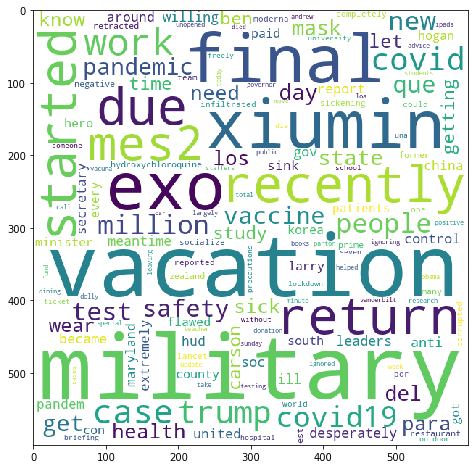

In [53]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=150, 
                     normalize_plurals=True,collocations=False).\
generate_from_text(tweets_combined)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

## What are the sentiments of these tweets?

In [47]:
# import nltk
# nltk.download('vader_lexicon')

In [48]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

#### Defining a function to get the compound score for a given tweet

In [49]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [50]:
senti_score = [get_sentiment_vader(txt) for txt in tweets_clean2]

In [51]:
senti_score[:5]

[-0.3182, 0.0, 0.0, 0.0, 0.0]

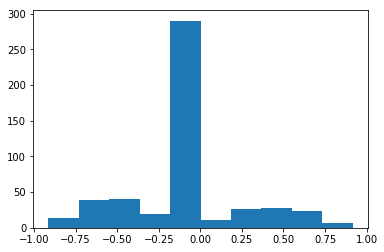

In [52]:
plt.hist(senti_score)
plt.show()

In [53]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

##### Creating a dataframe with the tweets, to which we will add the sentiement classification

In [54]:
df = pd.DataFrame({'tweet':tweets_clean2})
df.head()

,tweet
0,org many schools remain return remote learning...
1,sum dico doctor francisco moreno recalca desga...
2,con este estamos feos para foto
3,
4,sarscov2 covid19 polqc assnat polmtl


In [55]:
df['sentiment'] = df.tweet.apply(get_sentiment)

In [56]:
df.head()

,tweet,sentiment
0,org many schools remain return remote learning...,Negative
1,sum dico doctor francisco moreno recalca desga...,Neutral
2,con este estamos feos para foto,Neutral
3,,Neutral
4,sarscov2 covid19 polqc assnat polmtl,Neutral


In [57]:
distr = df.sentiment.value_counts(normalize=True)
distr

Neutral     0.556
Negative    0.250
Positive    0.194
Name: sentiment, dtype: float64

##### Plotting - a pie chart of the sentiment classification

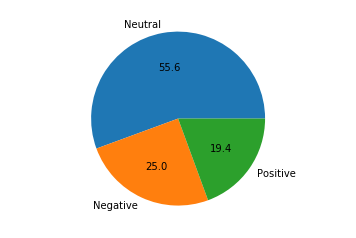

In [58]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

### Wordcloud for negative tweets

In [59]:
neg_tweets = df.tweet[df.sentiment=='Negative']
neg_tweets[5:10]

43    patrons wanting the lower manhattan restaurant...
47    reduced our pentagon budget could redirect the...
54    negative covid test not enough antibodies from...
55    literally everything dabo has said the last ye...
58    reduced our pentagon budget could redirect the...
Name: tweet, dtype: object

In [60]:
neg_tweets_combined = " ".join(neg_tweets.values)

In [61]:
neg_tweets_combined[:500]

'org many schools remain return remote learning models important stay aware stressors facing students does anyone remember why were originally urged bend the curve the the immediate fear was that deat america letting the rage through prisons florida woman works get thousands unemployment issues resolved via patrons wanting the lower manhattan restaurant will have pay for test get past the patrons wanting the lower manhattan restaurant will have pay for test get past the reduced our pentagon budge'

In [62]:
# from wordcloud import STOPWORDS
# print(STOPWORDS)

In [63]:
# mystop = list(STOPWORDS) + ['economy']
# print(mystop)

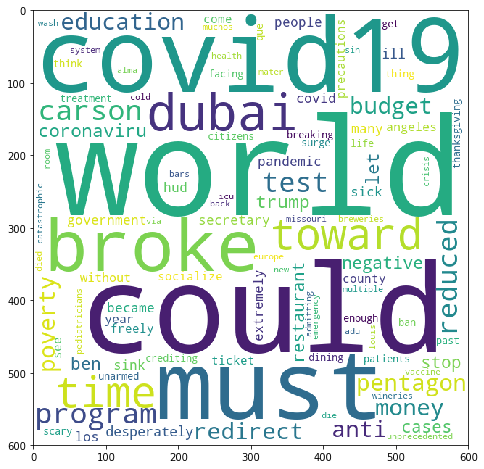

In [64]:
word_cloud=WordCloud(width=600,height=600,stopwords= stop_nltk,background_color='white',max_words=100,normalize_plurals=True,collocations=False).generate_from_text(" ".join(neg_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [65]:
len(neg_tweets[neg_tweets.str.contains('modi')])

0

In [66]:
neg_tweets[neg_tweets.str.contains('republicans')]

Series([], Name: tweet, dtype: object)

### Wordcloud for positive tweets

In [67]:
pos_tweets = df.tweet[df.sentiment=='Positive']
pos_tweets[:5]

7     count thanksgiving the latest victim 2020 anot...
13    report maryland gov larry hogan anti trump her...
14    people america needs turn back god the only tr...
15               glimpse into what travel may look like
16    people with doctorates architecture treat buil...
Name: tweet, dtype: object

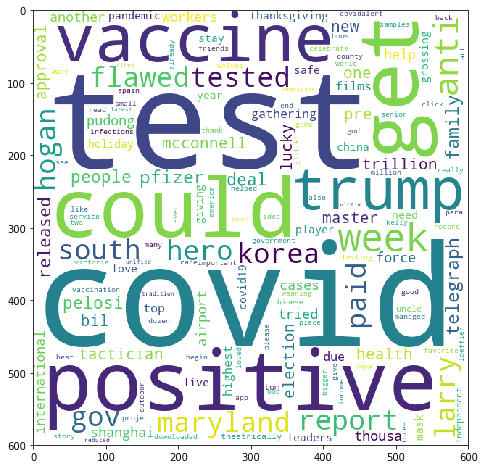

In [68]:
word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=stop_nltk,max_words=150,normalize_plurals=True,collocations=False).generate_from_text(" ".join(pos_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [69]:
pos_tweets[pos_tweets.str.contains('novel')]

Series([], Name: tweet, dtype: object)

### Defining a function to get tweets for a keyword and plot the sentiment pie chart and the word clouds

In [70]:
def live_sentiment(query_term):
    
    #Get the tweets for the term
    fetched_tweets = tweepy.Cursor(api.search, q=query_term).items(100)
    tweets_raw = []
    for twt in fetched_tweets:
         tweets_raw.append(twt.text)


    #Cleaning the tweets
    tweets_clean = list(map(clean_tweet, tweets_raw))
    stop_nltk = stopwords.words("english")
    mystop = list(stop_nltk) + ['rt', 'amp', query_term]
    df = pd.DataFrame({'tweet':tweets_clean})
    
    #Get sentiment
    df['sentiment'] = df.tweet.apply(get_sentiment)
    distr = df.sentiment.value_counts(normalize=True)

    #Plotting the sentiment distribution
    fig, ax = plt.subplots(); ax.axis("equal")
    ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
    plt.show()

    #Wordcloud for positive tweets
    pos_tweets = df.tweet[df.sentiment=='Positive']
    word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=mystop,max_words=150,normalize_plurals=True,collocations=True).generate_from_text(" ".join(pos_tweets))
    plt.figure(figsize=(6,6),facecolor=None)
    plt.imshow(word_cloud)

    #Wordcloud for negative tweets
    neg_tweets = df.tweet[df.sentiment=='Negative']
    word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=mystop,max_words=150,normalize_plurals=True,collocations=True).generate_from_text(" ".join(neg_tweets))
    plt.figure(figsize=(6,6),facecolor=None)
    plt.imshow(word_cloud)

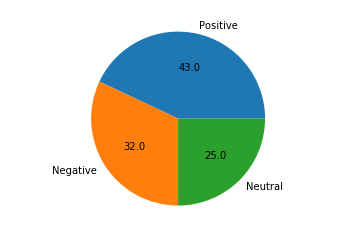

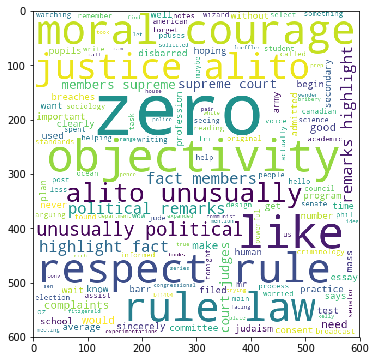

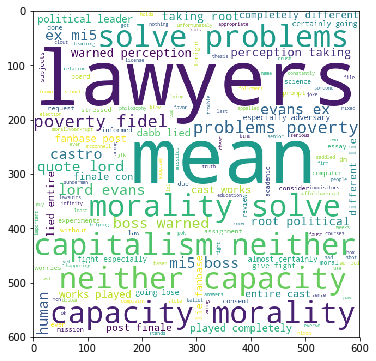

In [71]:
live_sentiment('ethics')

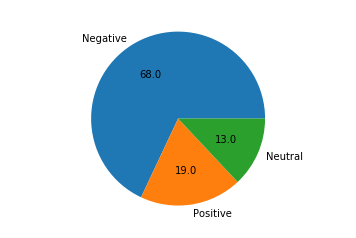

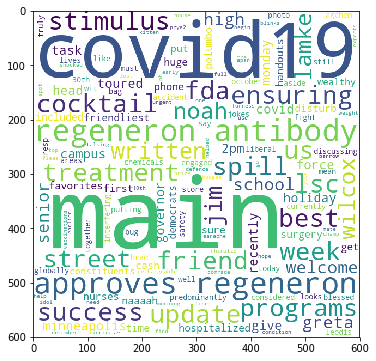

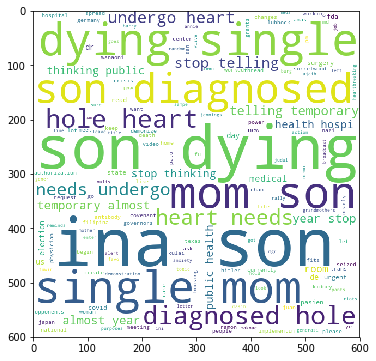

In [72]:
live_sentiment('emergency')